In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [47]:
bb=pd.read_csv('C://Users//aaliy//Documents//bike_buyers.csv')

In [48]:
bb.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [49]:
bb.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
999,12121,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


In [50]:
bb.shape

(1000, 13)

In [51]:
bb.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [52]:
bb.dropna(inplace=True)

In [53]:
bb.drop_duplicates()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [54]:
bb.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [55]:
bb.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [56]:
bb['Marital Status'].unique()

array(['Married', 'Single'], dtype=object)

In [57]:
bb['Marital Status'].replace({'Single':1, 'Married':2, 'nan':0}, inplace=True)

In [58]:
bb['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [59]:
bb['Gender'].replace({'Male':1, 'Female':2},inplace=True)

In [60]:
bb['Education'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [61]:
categorical_col =['Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']

In [62]:
label_encode = LabelEncoder()

In [63]:
for col in categorical_col:
    bb[col]=label_encode.fit_transform(bb[col])

In [64]:
bb.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,2,2,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,2,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,2,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1
5,13507,2,2,10000.0,2.0,3,2,1,0.0,1,0,50.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

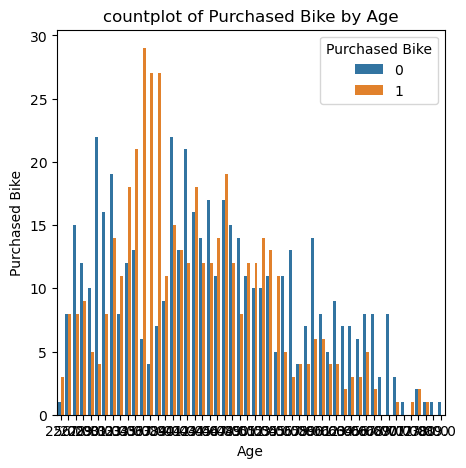

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(bb, x= 'Age', hue= 'Purchased Bike')
plt.xlabel('Age')
plt.ylabel('Purchased Bike')
plt.title('countplot of Purchased Bike by Age')
plt.show

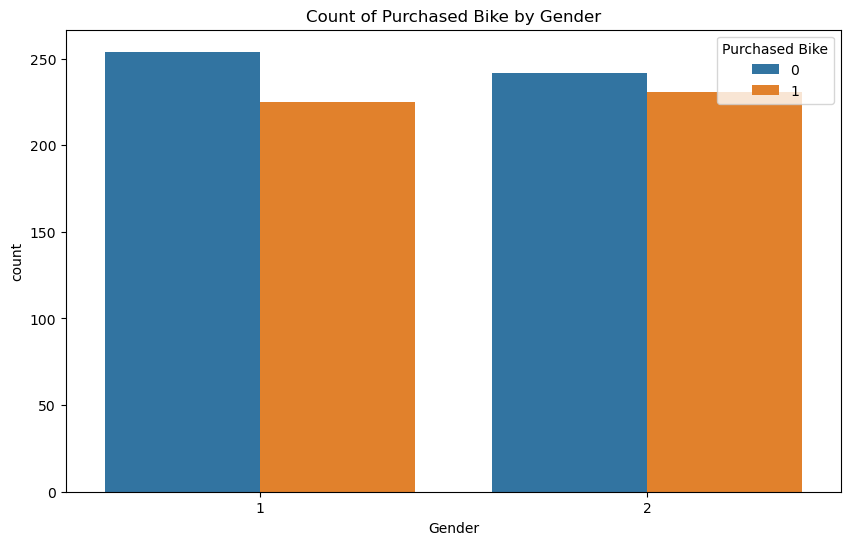

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Purchased Bike', data=bb)
plt.title('Count of Purchased Bike by Gender')
plt.show()

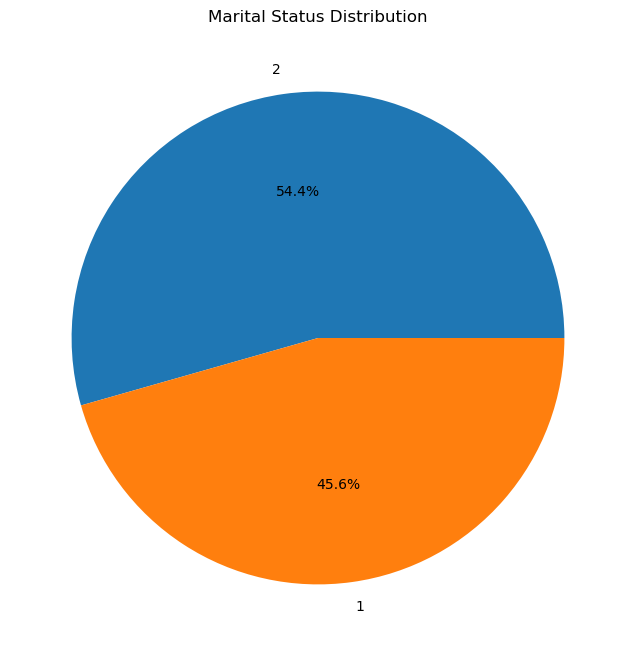

In [67]:
plt.figure(figsize=(8, 8))
bb['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()


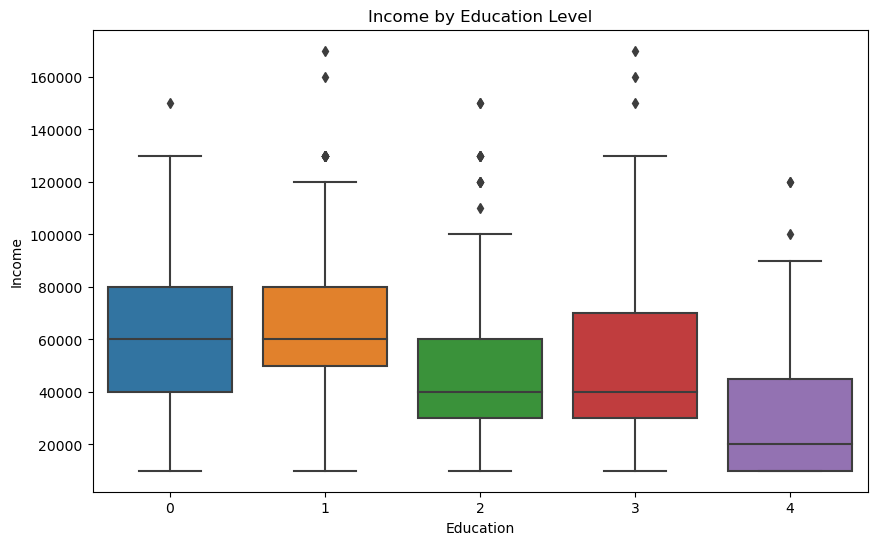

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=bb)
plt.title('Income by Education Level')
plt.show()

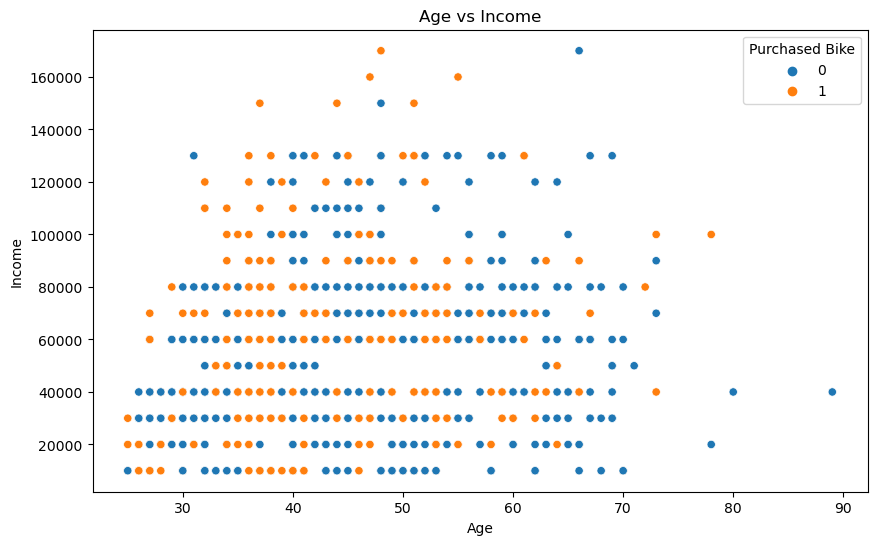

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Purchased Bike', data=bb)
plt.title('Age vs Income')
plt.show()

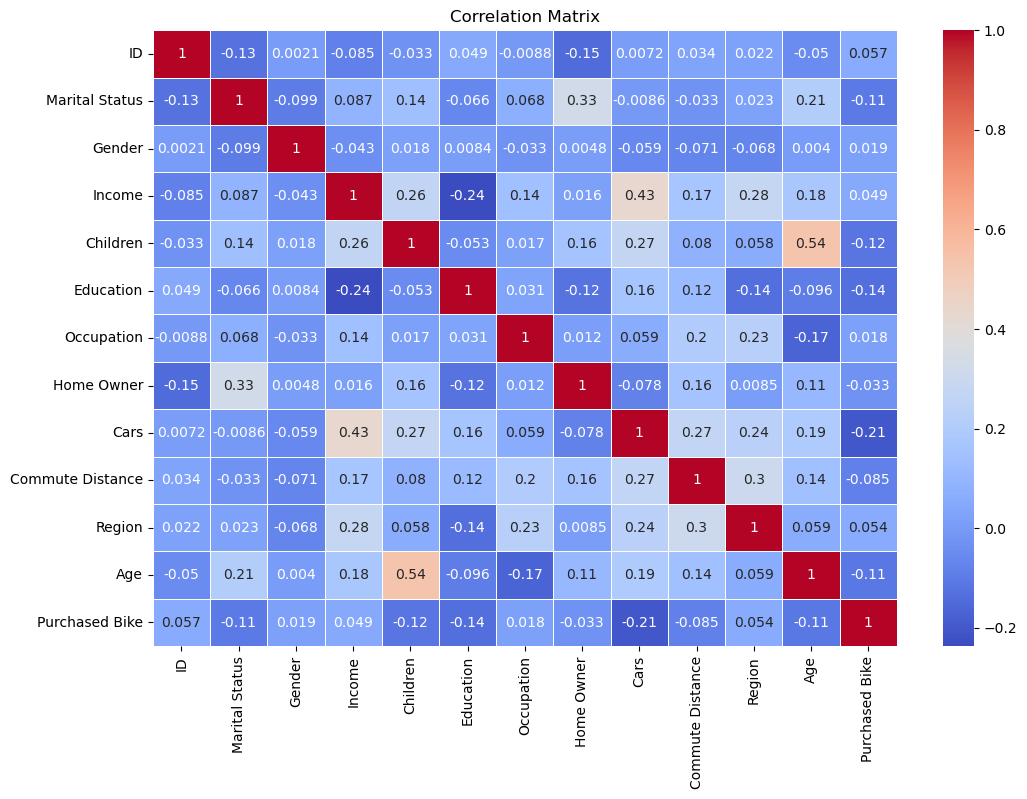

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(bb.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [71]:
x=bb.drop(['Purchased Bike'], axis=1)
y=bb['Purchased Bike']

In [72]:
x

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,12496,2,2,40000.0,1.0,0,4,1,0.0,0,0,42.0
1,24107,2,1,30000.0,3.0,3,0,1,1.0,0,0,43.0
2,14177,2,1,80000.0,5.0,3,3,0,2.0,3,0,60.0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0
5,13507,2,2,10000.0,2.0,3,2,1,0.0,1,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,2,1,80000.0,5.0,3,3,1,3.0,1,1,46.0
995,23731,2,1,60000.0,2.0,2,3,1,2.0,3,1,54.0
996,28672,1,1,70000.0,4.0,1,3,1,0.0,3,1,35.0
998,19664,1,1,100000.0,3.0,0,1,0,3.0,1,1,38.0


In [73]:
y

0      0
1      0
2      0
4      1
5      0
      ..
994    0
995    1
996    1
998    0
999    1
Name: Purchased Bike, Length: 952, dtype: int32

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
x_train.shape


(761, 12)

In [76]:
x_test.shape

(191, 12)

In [77]:
dtc=DecisionTreeClassifier()

In [78]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
dtcpred=dtc.predict(x_test)

In [80]:
dtcpred[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy=accuracy_score(y_test,dtcpred)*100

In [83]:
accuracy

69.10994764397905

In [84]:
rfc=RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
new_inputs=[12732, 4, 1, 30000.0, 3.0, 1, 3, 2, 0.5, 0, 1, 12.0]

In [87]:
prediction = rfc.predict([new_inputs])

In [88]:
prediction 

array([0])